In [68]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
import tensorflow_hub as hub

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from PIL import Image

In [57]:
class ImageLoader(BaseEstimator, TransformerMixin):
    def __init__(self, path, images):
        self.path = path
        self.images = images

    def fit(self, X=None, y=None):
        return self

    def transform(self, X):
        images_data = []
        image_path_content = f'{self.path}{self.images[0]}'
        image_path_style = f'{self.path}{self.images[1]}'
        images_data.append(plt.imread(image_path_content))
        images_data.append(plt.imread(image_path_style))
        return images_data

In [61]:
class ObjectDetector(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        content_image = X[0].astype(np.float32)[np.newaxis, ...] / 255.
        style_image = X[1].astype(np.float32)[np.newaxis, ...] / 255.
        style_image = tf.image.resize(style_image, (256, 256))
        result = model(tf.constant(content_image), tf.constant(style_image))[0]
        plt.imshow(np.squeeze(result))
        plt.show()
        return self

In [54]:
path = "images/"
images = [ "David.jpg", "The_Scream.jpg"]
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [62]:
pipeline = Pipeline([
    ('image_loader', ImageLoader(path, images)),
    ('object_detector', ObjectDetector(model))
])

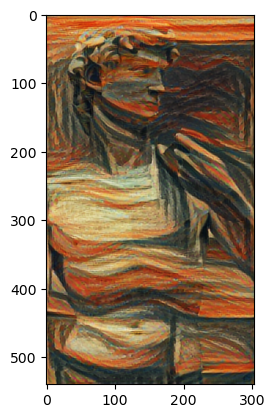

ObjectDetector(model=<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x0000021A89F21540>)

In [63]:
image_indices = [0, 1]

pipeline.fit_transform(image_indices)

In [64]:
images = [ "David.jpg", "sketch.jpg"]

In [65]:
pipeline = Pipeline([
    ('image_loader', ImageLoader(path, images)),
    ('object_detector', ObjectDetector(model))
])

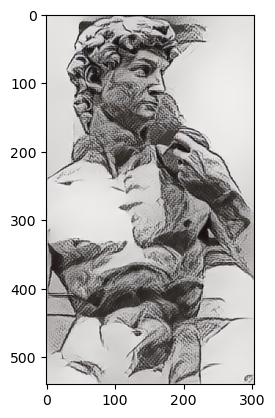

ObjectDetector(model=<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x0000021A89F21540>)

In [66]:
image_indices = [0, 1]

pipeline.fit_transform(image_indices)

<h1> VIDEO <h1>

In [70]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [71]:
def stylize_frame(frame, model, style_image):
    content_image = frame.astype(np.float32)[np.newaxis, ...] / 255.
    stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
    return np.squeeze(stylized_image) * 255

In [72]:
def process_video(input_path, output_path, style_image_path, model):
    cap = cv2.VideoCapture(input_path)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    style_image = plt.imread(style_image_path)
    style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
    style_image = tf.image.resize(style_image, (256, 256))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        stylized_frame = stylize_frame(frame, model, style_image)
        stylized_frame = stylized_frame.astype(np.uint8)

        out.write(stylized_frame)

    cap.release()
    out.release()

In [73]:
input_video_path = 'sample.mp4'
output_video_path = 'output_video.mp4'
style_image_path = 'images/The_Scream.jpg'

process_video(input_video_path, output_video_path, style_image_path, model)

<h1> Оригинальный алгоритм (не удалять)<h1>

In [ ]:
content_image = plt.imread('David.jpg')
style_image = plt.imread('The_Scream.jpg')

In [ ]:
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.

In [ ]:
style_image = tf.image.resize(style_image, (256, 256))

In [ ]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [ ]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()